# Odhad lineárního regresního modelu pomocí metody OLS

In [2]:
# Import knihoven
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Načtení datasetu z excelu
df = pd.read_excel("porsche_data.xlsx", "porsche_data")

df.drop(columns=["Model", "Series"], inplace=True)

# Zkoumané proměnné (Hned v prvním modelu nebudeme využívat proměnné Year - silná korelace se sérií a IS992 - zamezení multikolinearity)
print(df.keys())

Index(['Price', 'Year', 'IS911', 'IS996', 'IS964', 'IS993', 'IS997', 'IS991',
       'IS992', 'Special', 'S', 'RS', 'Turbo', 'GT', 'Targa', 'Cabriolet',
       'Mileage', 'Power', 'CylCap', 'Automat', 'PDK', 'AWD', 'IntColor',
       'ExtCol'],
      dtype='object')


## Modely

### Model 1a

In [6]:
# LRM model se všemi proměnnými
Y = df["Price"]
X = df[["IS911", "IS964", "IS993", "IS996", "IS997", "IS991", "Special", "S", "RS", "Turbo", "GT", "Targa", "Cabriolet", "Automat", "PDK", "AWD", "IntColor", "ExtCol", "Mileage", "Power", "CylCap"]]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()
print(model1.summary())

# Určení statisticky nevýznamných proměnných
p_threshold = 0.1
nevyznamne = model1.pvalues[model1.pvalues > p_threshold]
print("\nStatisticky nevýznamné proměnné:\n", nevyznamne)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     248.5
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:50:40   Log-Likelihood:                -17480.
No. Observations:                1473   AIC:                         3.500e+04
Df Residuals:                    1451   BIC:                         3.512e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.012e+04   1.54e+04      1.304      0.1

In [7]:
# Reset test modelu 1
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model1, power=3)
print("P-hodnota:", reset_test.pvalue)

P-hodnota: 0.0


### Model 1b

In [9]:
# LRM model očištěný o statisticky nevýznamné proměnné (postupně jsem jednotlivé proměnné odstraňoval)
Y = df["Price"]
X = df[["IS911", "IS964", "IS993", "IS996", "IS997", "IS991", "Special", "S", "RS", "GT", "Targa", "Cabriolet", "Automat", "PDK", "Mileage", 
        "Power"]]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     326.1
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:50:41   Log-Likelihood:                -17482.
No. Observations:                1473   AIC:                         3.500e+04
Df Residuals:                    1456   BIC:                         3.509e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.29e+04   8379.901      1.539      0.1

In [10]:
# Reset test modelu 2
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model2, power=3)
print("P-hodnota:", reset_test.pvalue)

P-hodnota: 0.0


In [11]:
# P-hodnota reset testu vychází velmi nízká, zkusím zlogaritmovat vysvětlovanou a spojité vysvětlující proměnné
# Také přidám interakční člen MileagexYear
df["MileagexYear"] = df["Mileage"] * df["Year"]

# Zlogaritmování spojitých proměnných v modelu
df[["log_price", "log_mileage", "log_power", "log_cylcap", "log_mileagexyear"]] = df[["Price", "Mileage", "Power", "CylCap", "MileagexYear"]].apply(np.log)

### Model 1c

In [13]:
# LRM se spojitými proměnnými v logaritmu
Y = df["log_price"]
X = df[["IS911", "IS964", "IS993", "IS996", "IS997", "IS991", "Special", "S", "RS", "Turbo", "GT", "Targa", "Cabriolet", "Automat", "PDK", "AWD", "IntColor", "ExtCol", 
        "log_power", "log_cylcap","log_mileage", "log_mileagexyear"]]
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()
print(model3.summary())

# Určení statisticky nevýznamných proměnných
p_threshold = 0.1
nevyznamne = model3.pvalues[model3.pvalues > p_threshold]
print("\nStatisticky nevýznamné proměnné:\n", nevyznamne)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:50:41   Log-Likelihood:                 165.56
No. Observations:                1473   AIC:                            -285.1
Df Residuals:                    1450   BIC:                            -163.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              166.7957     39.653  

In [14]:
# Reset test modelu 3
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model3, power=3)
print("P-hodnota:", reset_test.pvalue)

P-hodnota: 1.1416825439626716e-48


### Model 1d

In [16]:
# Zlogaritmovaný LRM model postupně očištěný o statisticky nevýznamné proměnné
Y = df["log_price"]
X = df[["IS911", "IS964", "IS993", "IS996", "IS997", "IS991", "Special", "S", "RS", "Turbo", "GT", "Targa", "Cabriolet", 
        "log_power", "log_cylcap","log_mileage", "log_mileagexyear", "Automat", "IntColor"]]
X = sm.add_constant(X)
model4 = sm.OLS(Y, X).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     382.1
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:50:41   Log-Likelihood:                 163.73
No. Observations:                1473   AIC:                            -287.5
Df Residuals:                    1453   BIC:                            -181.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              174.8560     39.189  

In [17]:
# Reset test modelu 4
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model4, power=3)
print("P-hodnota:", reset_test.pvalue)

P-hodnota: 4.498690039774061e-50


### Model 2

In [19]:
# Log-lin model již očištěný o statisticky nevýznamné proměnné (oproti log-log modelu výše vyřazena proměnná IntColor)
# Model ve tvaru log-lin se zdá být nejvhodnější (dle nejvyššího koef. determinace a p-hodnoty RESET testu) 
Y = df["log_price"]
X = df[["IS911", "IS964", "IS993", "IS996", "IS997", "IS991", "Special", "S", "RS", "Turbo", "GT", "Targa", "Cabriolet", "Automat", "Power", "Mileage", "CylCap"]]
X = sm.add_constant(X)
model5= sm.OLS(Y, X).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     514.3
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:50:41   Log-Likelihood:                 278.61
No. Observations:                1473   AIC:                            -521.2
Df Residuals:                    1455   BIC:                            -425.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4855      0.087    131.349      0.0

In [20]:
# Reset test modelu 5
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model5, power=3)
print("P-hodnota:", reset_test.pvalue)

P-hodnota: 0.00022819301718977528


## Multikolinearita

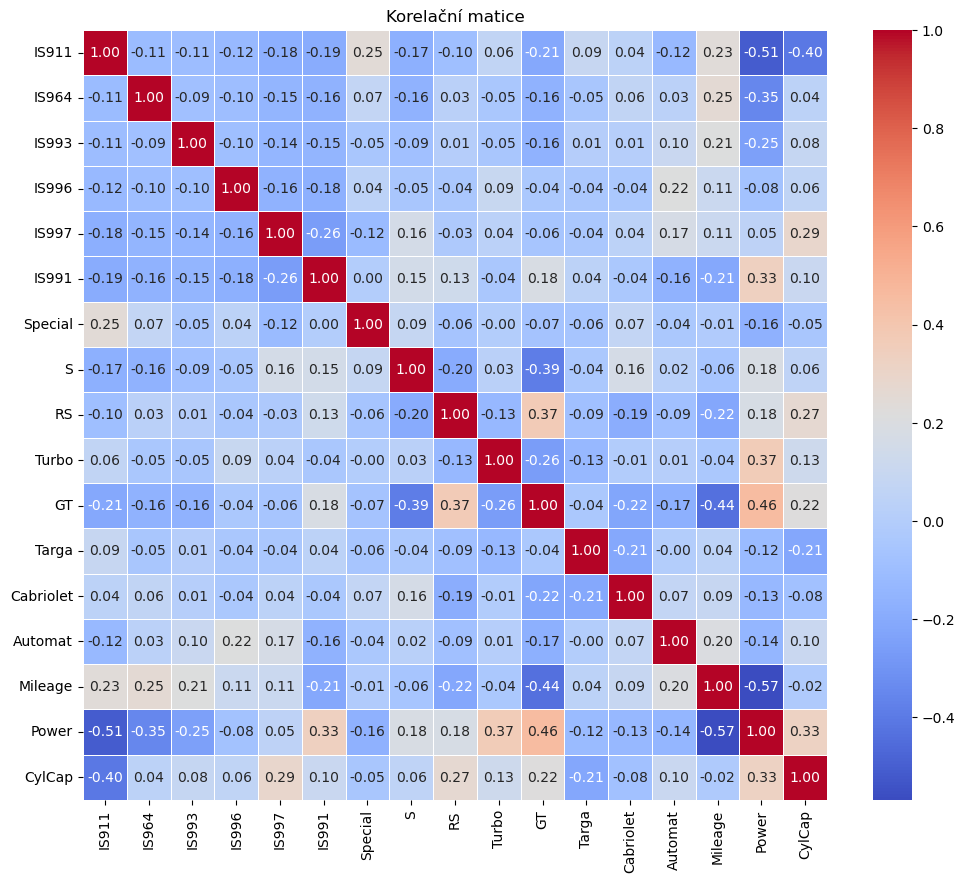

     Variable         VIF
0       const  277.375572
1       IS911    7.865767
2       IS964    5.131214
3       IS993    3.814355
4       IS996    3.360946
5       IS997    3.689140
6       IS991    2.089658
7     Special    1.180978
8           S    2.050570
9          RS    1.412161
10      Turbo    4.459759
11         GT    3.893007
12      Targa    1.153426
13  Cabriolet    1.159575
14    Automat    1.184157
15      Power   13.746120
16    Mileage    1.907488
17     CylCap    1.857822


In [22]:
# Korelační matice vysvětlujících proměnných modelu
corr_matrix = df[["IS911", "IS964", "IS993", "IS996", "IS997", "IS991", "Special", "S", "RS", "Turbo", "GT", "Targa", "Cabriolet", "Automat", "Mileage", "Power", "CylCap"]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm",linewidths=0.5, annot=True, fmt=".2f")
plt.title("Korelační matice")
plt.savefig("seaborn_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

## Klasické předpoklady
1. <b>Linearita vztahu</b>
2. <b>Homoskedasticita</b> vysvětlované proměnné/náhodných složek
3. <b>Nekorelovanost</b> náhodných složek
4. <b>Normalita</b> vysvětlované proměnné/náhodných složek
5. <b>Nekorelovanost regresorů s náhodnou složkou</b> 

### Heteroskedasticita

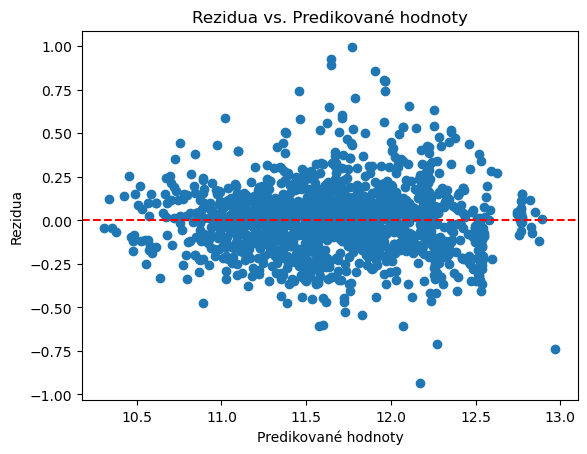

P-hodnota (Breusch-Pagan): 5.3991282723895374e-40
V modelu je přítomna heteroskedasticita


In [25]:
residuals = model5.resid

# Vizualizace reziduí
plt.scatter(model5.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Rezidua vs. Predikované hodnoty')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Rezidua')
plt.savefig("output-1.png")
plt.show()

# Breusch-Paganův test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, model5.model.exog)
print('P-hodnota (Breusch-Pagan):', bp_test[1])
print("V modelu je přítomna heteroskedasticita")

### Autokorelace

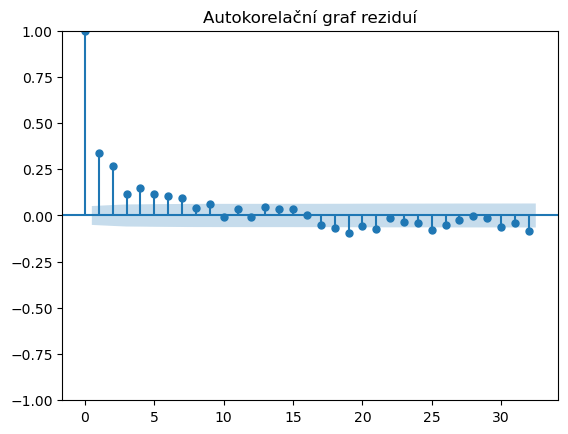

Durbin-Watson statistika: 1.324409527531995


In [27]:
# Testovat autokorelaci u průřezových dat je skoro nelogické, jelikož zde nemáme žádnou časovou složku
# Maximálně by se mohla v modelu vyskytovat tzv. prostorová ("spatial") autokorelace, ani ta ale v našem modelu nehraje roli
# Pro důkaz toho, že testovat autokorelaci v mém případě nemá smysl stačí v původním datasetu (Excel) jakkoliv jinak seřadit data a testy a autokorelační graf vyjdou jinak

# Autokorelační graf reziduí
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.title('Autokorelační graf reziduí')
plt.show()

# Durbin-Watsonův test
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print('Durbin-Watson statistika:', dw_stat)

### Normalita náhodných složek

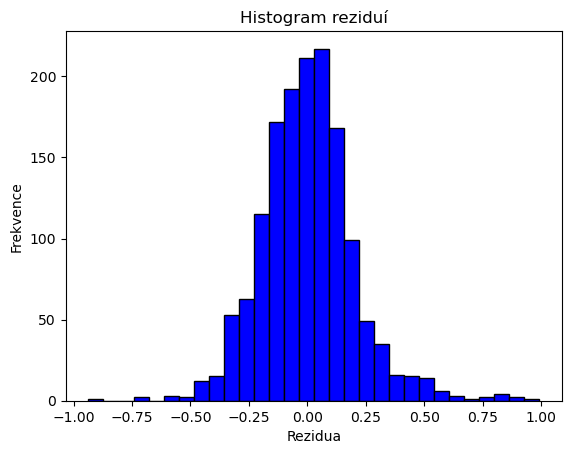

SignificanceResult(statistic=396.43389834778367, pvalue=8.231381948659195e-87)
ShapiroResult(statistic=0.9712661504745483, pvalue=1.501546290556233e-16)
Zamítáme hypotézu o normalním rozdělení reziduí


In [29]:
# Histogram reziduí
plt.hist(residuals, bins=30, color='blue', edgecolor='black')
plt.title('Histogram reziduí')
plt.xlabel('Rezidua')
plt.ylabel('Frekvence')
plt.show()

# Jarque-Bera test
from scipy.stats import jarque_bera
p_jb = jarque_bera(residuals)
print(p_jb)

# Shapiro-Wilkův test
from scipy.stats import shapiro
p_shapiro = shapiro(residuals)
print(p_shapiro)

print("Zamítáme hypotézu o normalním rozdělení reziduí")

### Endogenita v modelu

In [31]:
from scipy.stats import pearsonr
X_no_const = X.drop('const', axis=1, errors='ignore')
for col in X_no_const.columns:
    corr, _ = pearsonr(X_no_const[col], model5.resid)
    print(f"Korelace ({col}): {corr}")

Korelace (IS911): 1.455193549859551e-11
Korelace (IS964): 1.957143558319059e-11
Korelace (IS993): 1.6286771155462983e-11
Korelace (IS996): 1.0292234413098014e-11
Korelace (IS997): 5.983053818187429e-12
Korelace (IS991): -1.5454225745604014e-11
Korelace (Special): -9.2531237761938e-13
Korelace (S): -3.3835989520105518e-12
Korelace (RS): -1.7766725453649106e-11
Korelace (Turbo): -4.15984342560243e-12
Korelace (GT): -3.470584452295449e-11
Korelace (Targa): 3.200078698537781e-12
Korelace (Cabriolet): 7.197610976015731e-12
Korelace (Automat): 1.5379928990002747e-11
Korelace (Power): -4.229260467426163e-11
Korelace (Mileage): 8.338000628633143e-11
Korelace (CylCap): -1.4170246972560356e-12


## Finální model (Model 3)

In [33]:
final_model = model5.get_robustcov_results(cov_type='HC1')
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     742.0
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:50:42   Log-Likelihood:                 278.61
No. Observations:                1473   AIC:                            -521.2
Df Residuals:                    1455   BIC:                            -425.9
Df Model:                          17                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4855      0.100    115.216      0.0

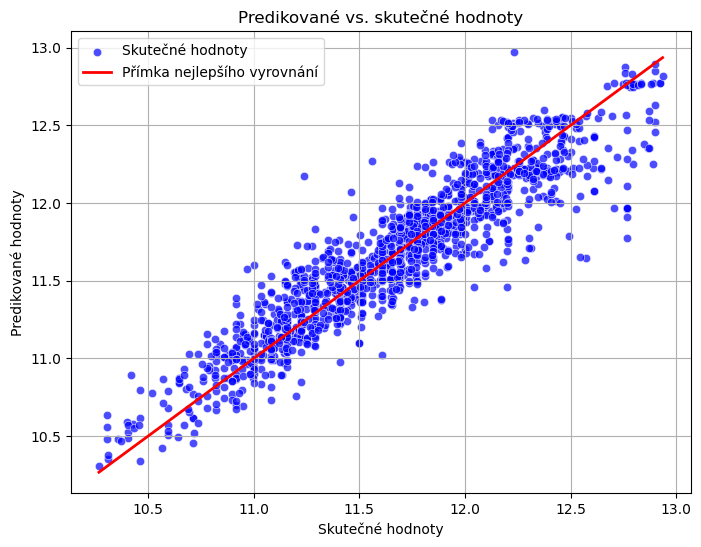

In [55]:
# Graf skutečných vs modelem predikovaných hodnot
y_pred = final_model.predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y, y=y_pred, color='blue', label='Skutečné hodnoty', alpha=0.7)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2, label="Přímka nejlepšího vyrovnání")
plt.xlabel('Skutečné hodnoty')
plt.ylabel('Predikované hodnoty')
plt.title('Predikované vs. skutečné hodnoty')
plt.legend()
plt.grid()
plt.show()